In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

In [20]:
cols = ["Id", "Topic", "Sentiment", "Tweet"] 
dataset = pd.read_csv("twitter_training.csv", names = cols)
dataset.head(30)

,Id,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [22]:
dataset["Tweet"].nunique()

69491

In [23]:
from wordcloud import WordCloud 
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, PunktTokenizer

In [41]:
def preprocess_text(text):
    tokens = word_tokenize(str(text).lower()) 
    tokens = [word for word in tokens if word.isalnum()] 
    tokens = [word for word in tokens if word not in stopwords.words("english")] 
    return ' '.join(tokens)

In [42]:
dataset["Tweet"].unique()

array(['im getting on borderlands and i will murder you all ,',
       'I am coming to the borders and I will kill you all,',
       'im getting on borderlands and i will kill you all,', ...,
       'Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice',
       'Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice',
       'Just like the windows partition of my Mac is like 6 years behind on its drivers So you have no idea how I didn’t notice'],
      dtype=object)

In [43]:
dataset["Cleaned_tweet"] = dataset["Tweet"].apply(preprocess_text)

In [44]:
dataset.head(10)

,Id,Topic,Sentiment,Tweet,Cleaned_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...,spent hours making something fun know huge bor...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,spent couple hours something fun know huge bor...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,spent hours something fun know huge borderland...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...,spent hours making something fun know huge rha...


In [45]:
dataset.shape

(74682, 5)

In [57]:
topic_count = dataset["Topic"].value_counts()

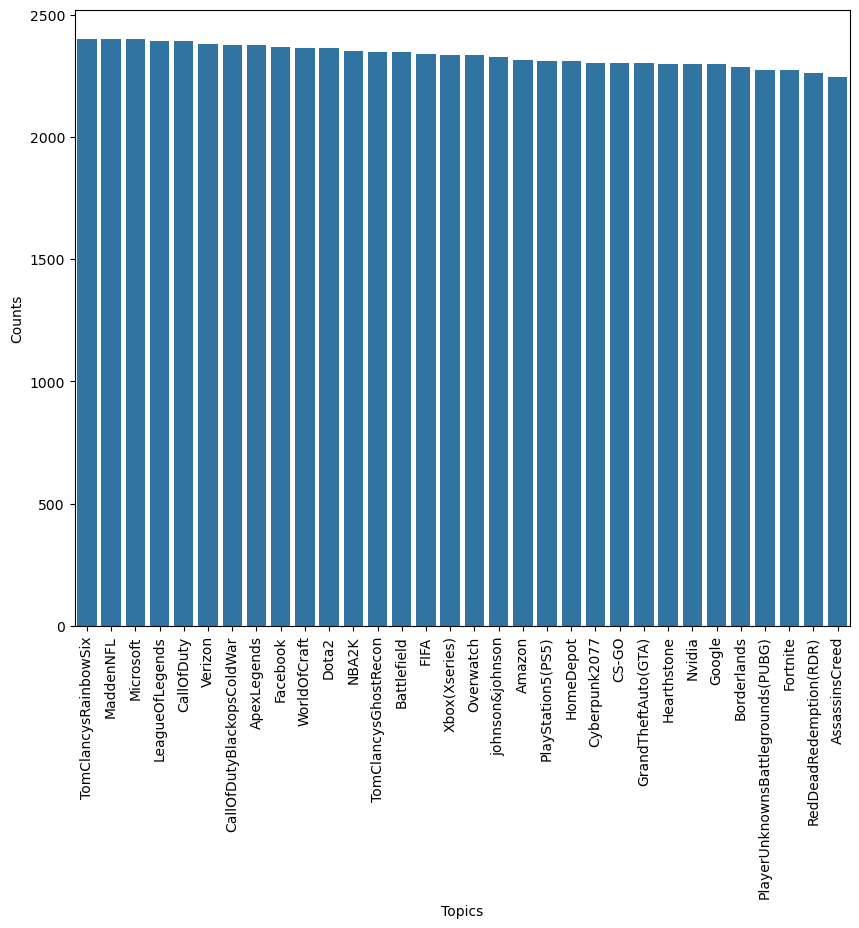

In [58]:
plt.figure(figsize = (10, 8))
sns.barplot(x = topic_count.index, y = topic_count.values)
plt.xticks(rotation = 90)
plt.xlabel("Topics")
plt.ylabel("Counts")
plt.show()

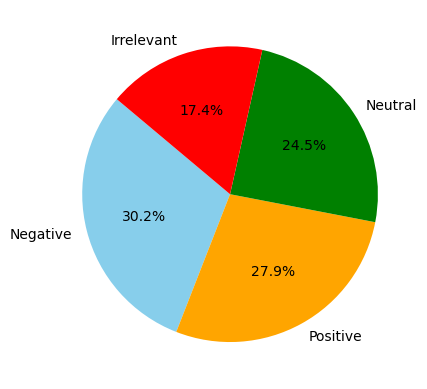

In [59]:
sentiment_count = dataset["Sentiment"].value_counts()
plt.pie(sentiment_count, labels = sentiment_count.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.show()


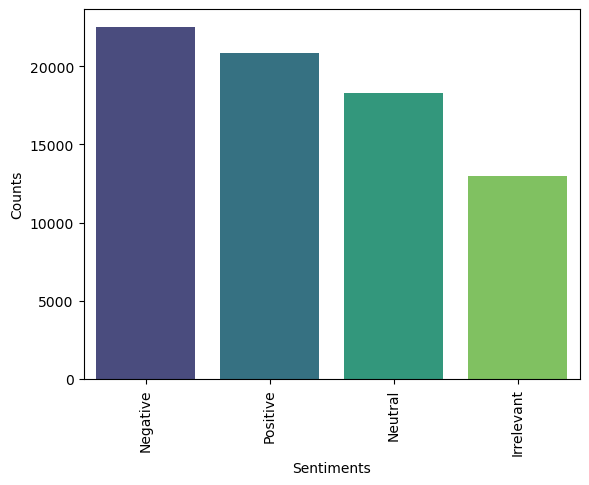

In [61]:
sns.barplot(x = sentiment_count.index, y = sentiment_count.values, palette='viridis')
plt.xticks(rotation = 90)
plt.xlabel("Sentiments")
plt.ylabel("Counts")
plt.show()

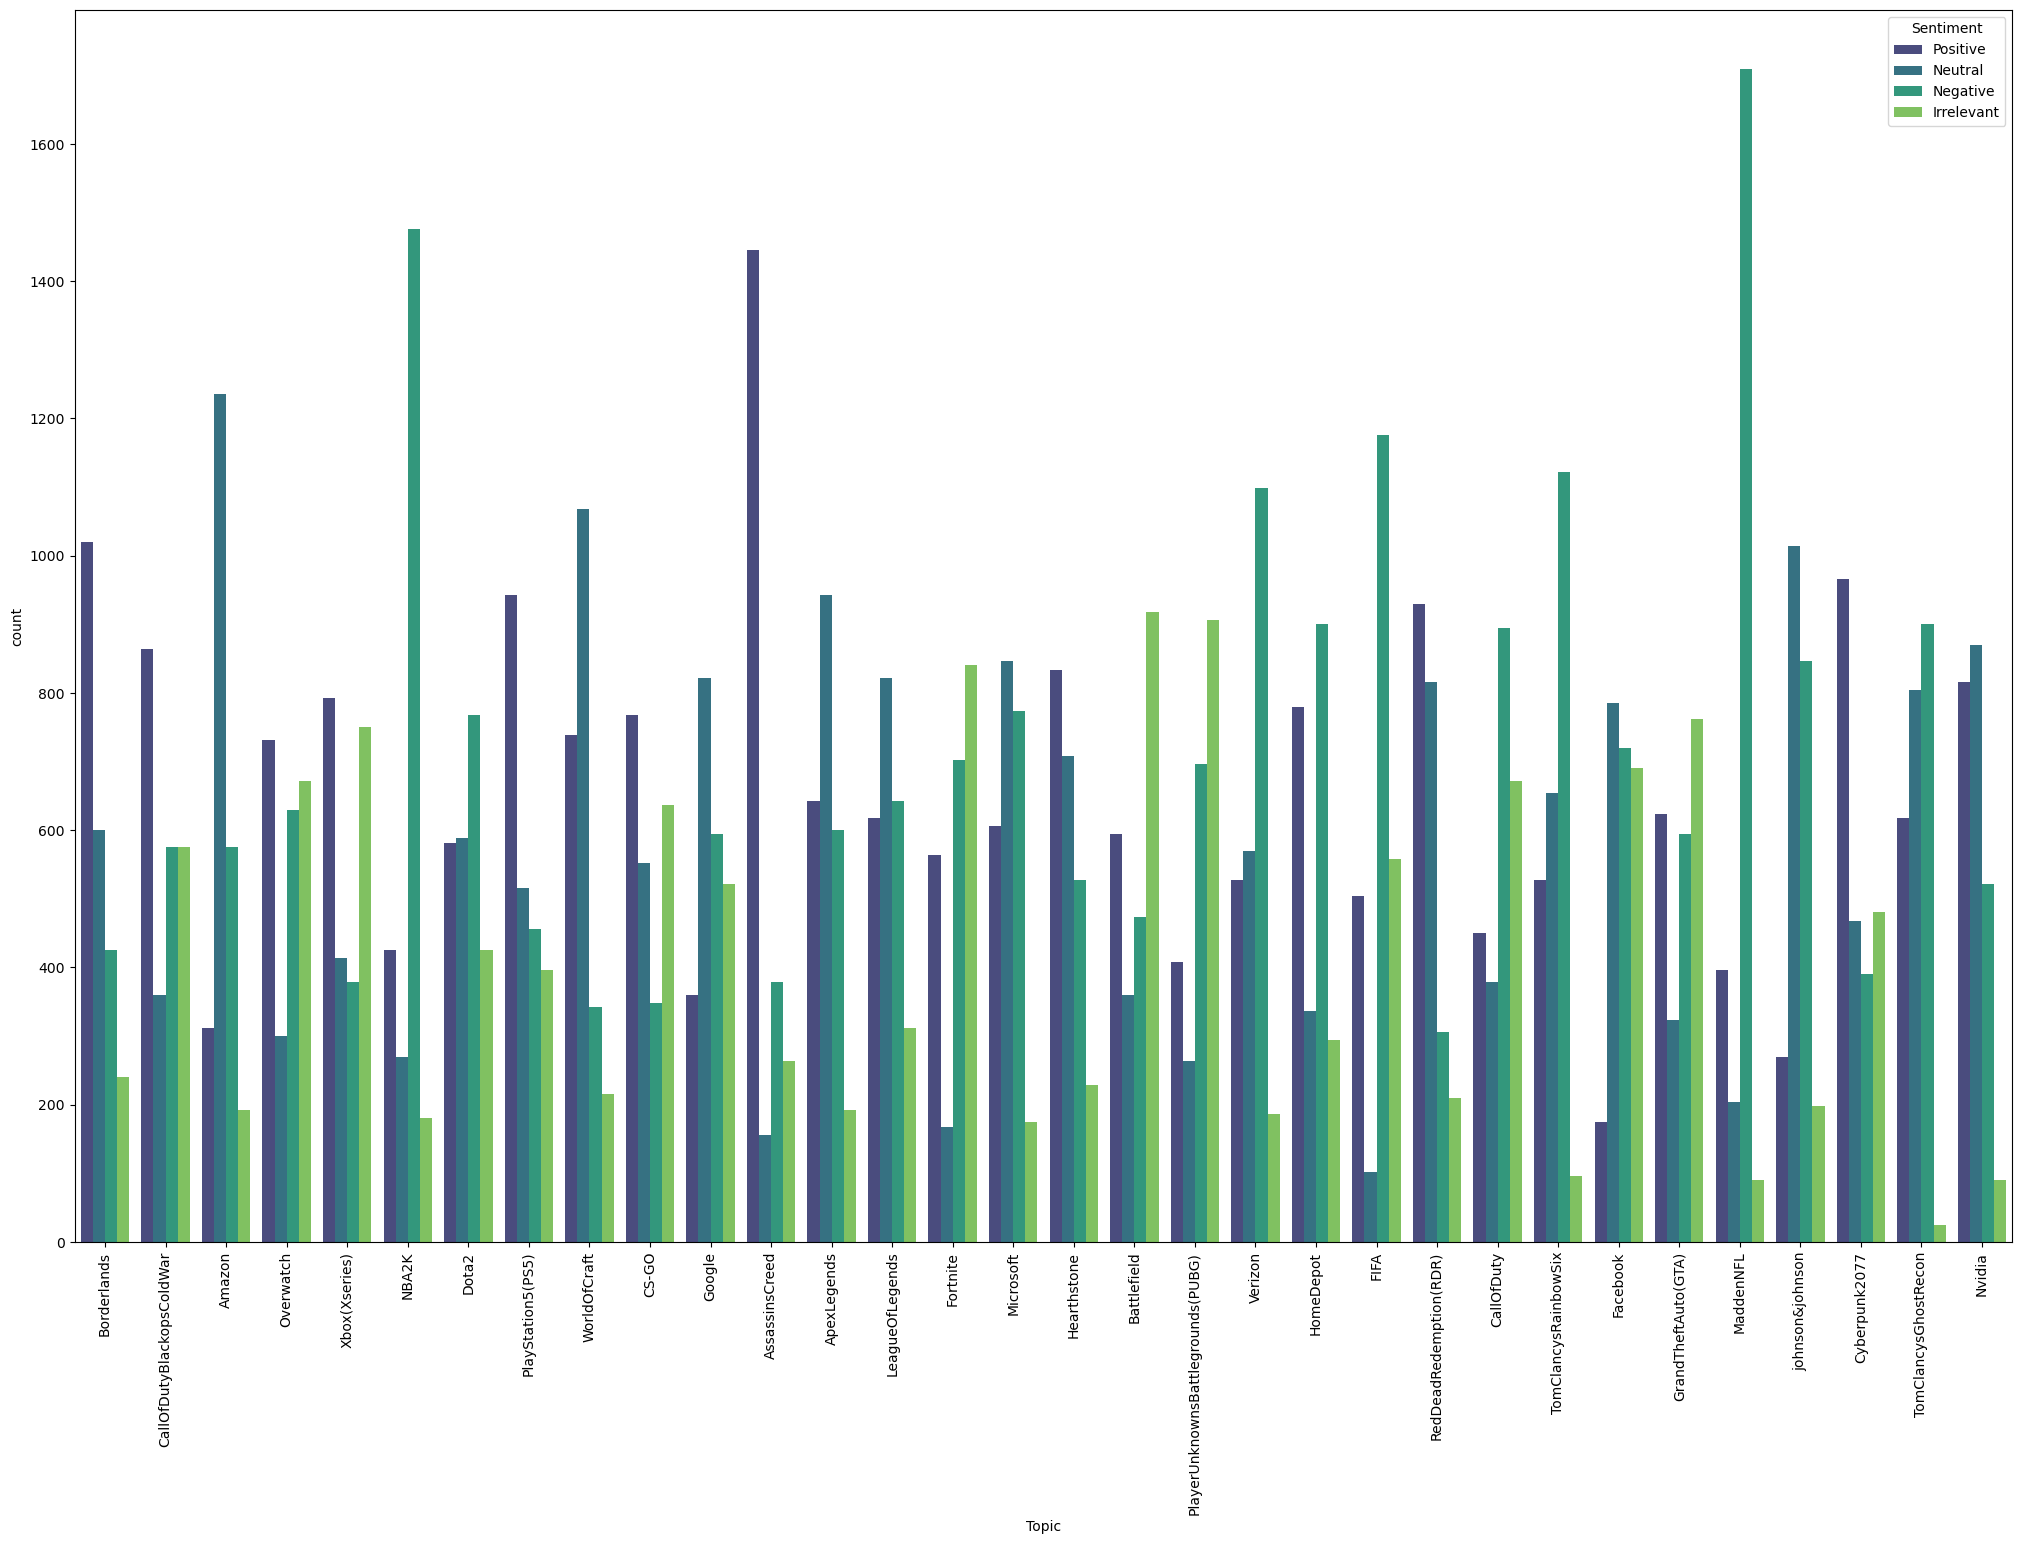

In [64]:
plt.figure(figsize=(25,16))
sns.countplot(x='Topic', data = dataset, palette='viridis', hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

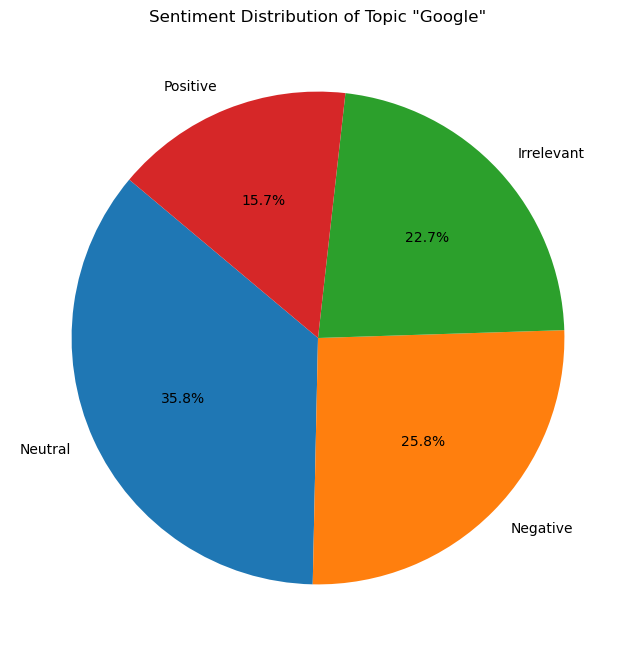

In [67]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = dataset[dataset['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

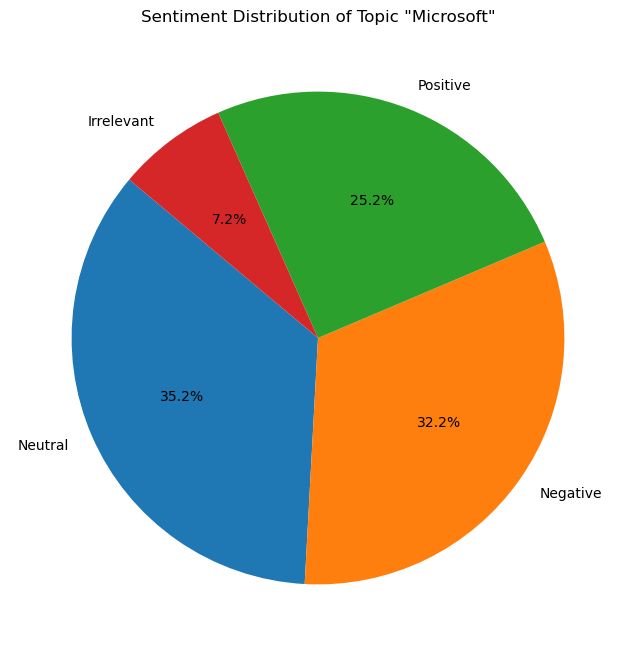

In [68]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = dataset[dataset['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [85]:
## Group by Topic and Sentiment
topic_wise_sentiment = dataset.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

#Select Top 5 Topics
topic_counts = dataset['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

In [86]:
top_topics_sentiment

,Topic,Sentiment,Count
24,CallOfDuty,Irrelevant,672
25,CallOfDuty,Negative,894
26,CallOfDuty,Neutral,378
27,CallOfDuty,Positive,450
68,LeagueOfLegends,Irrelevant,312
69,LeagueOfLegends,Negative,642
70,LeagueOfLegends,Neutral,822
71,LeagueOfLegends,Positive,618
72,MaddenNFL,Irrelevant,90
73,MaddenNFL,Negative,1710


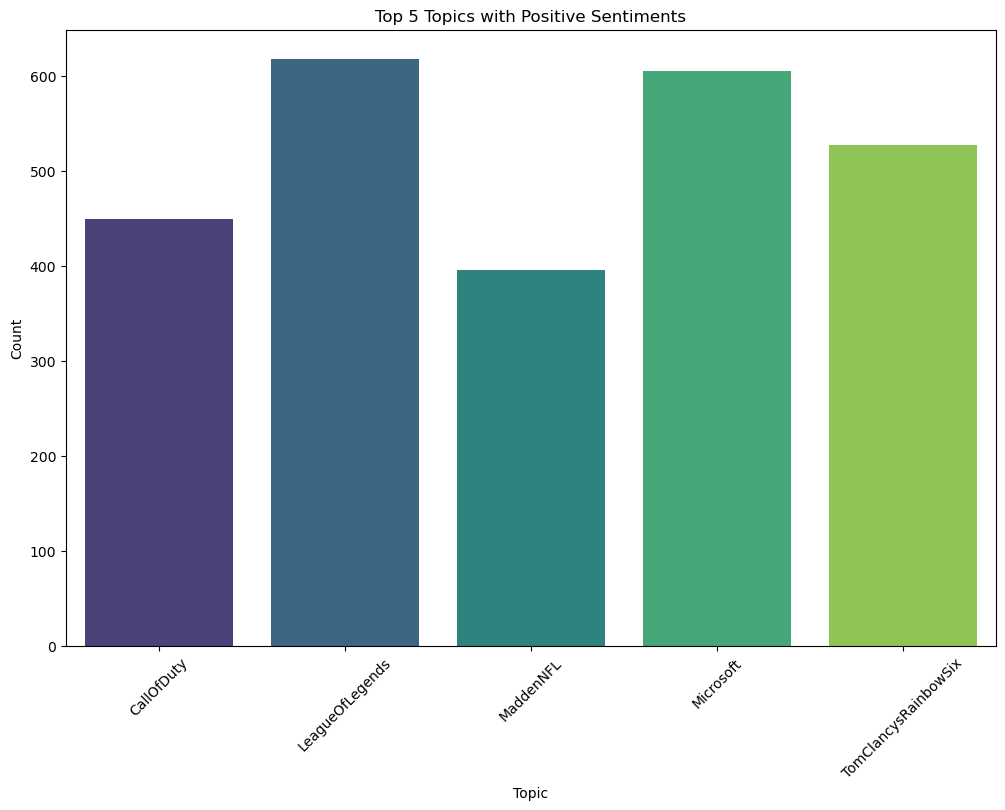

In [87]:
plt.figure(figsize=(12, 8))
sns.barplot(data = top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

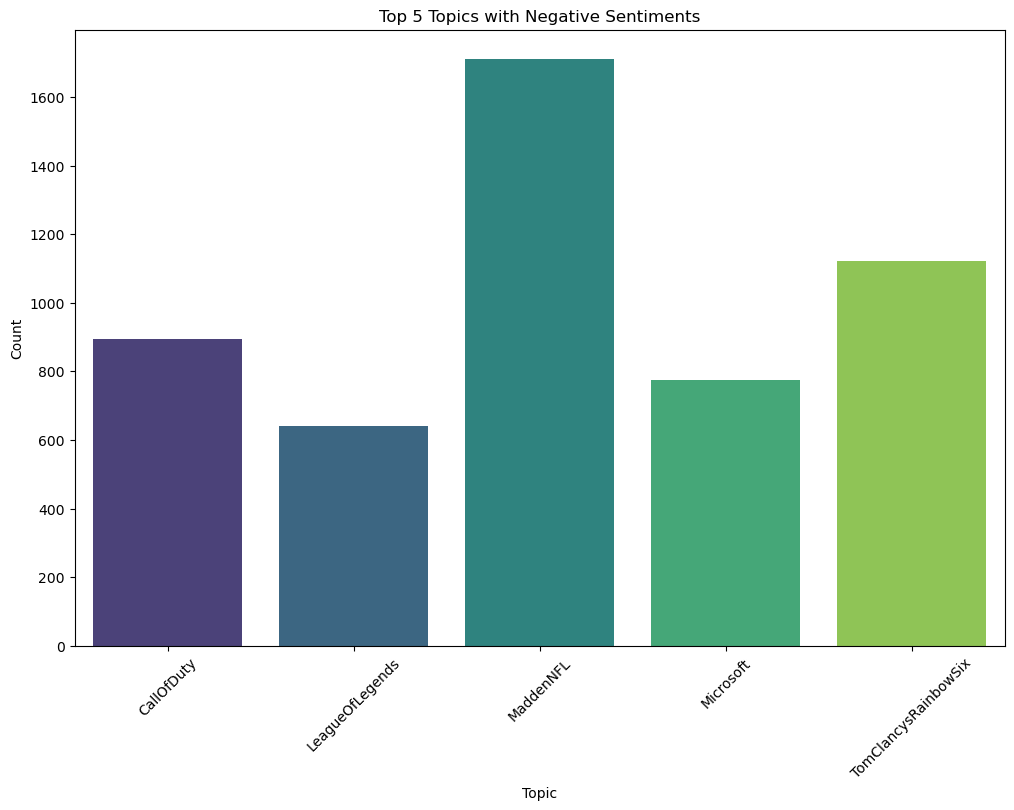

In [88]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

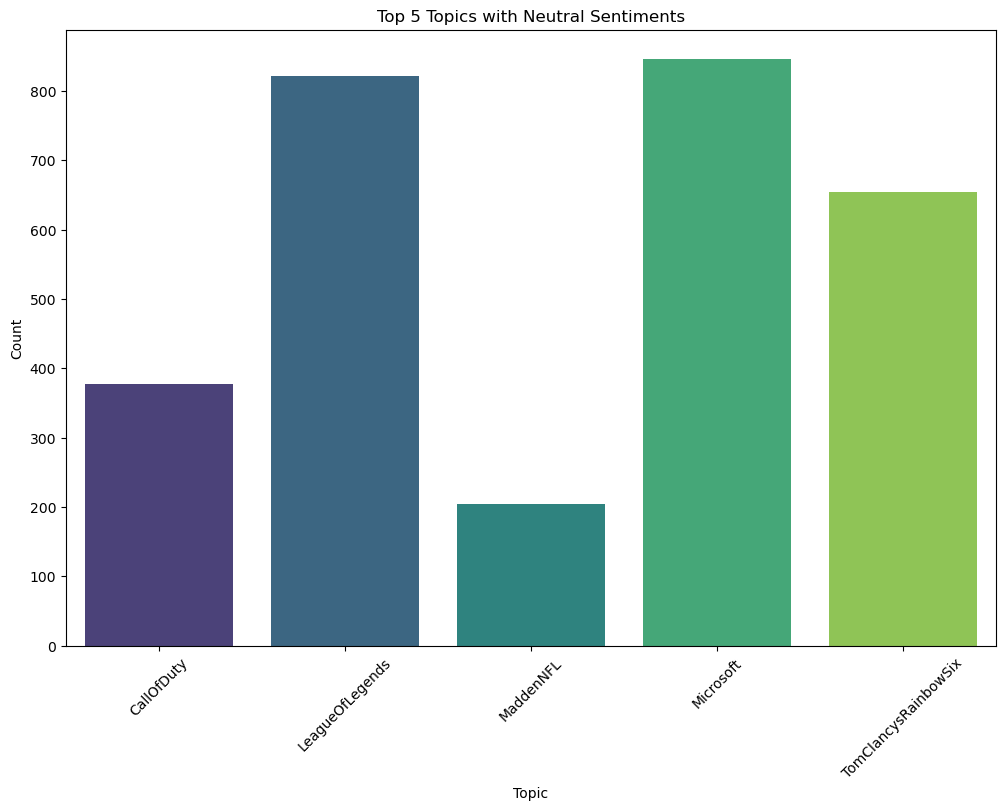

In [82]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

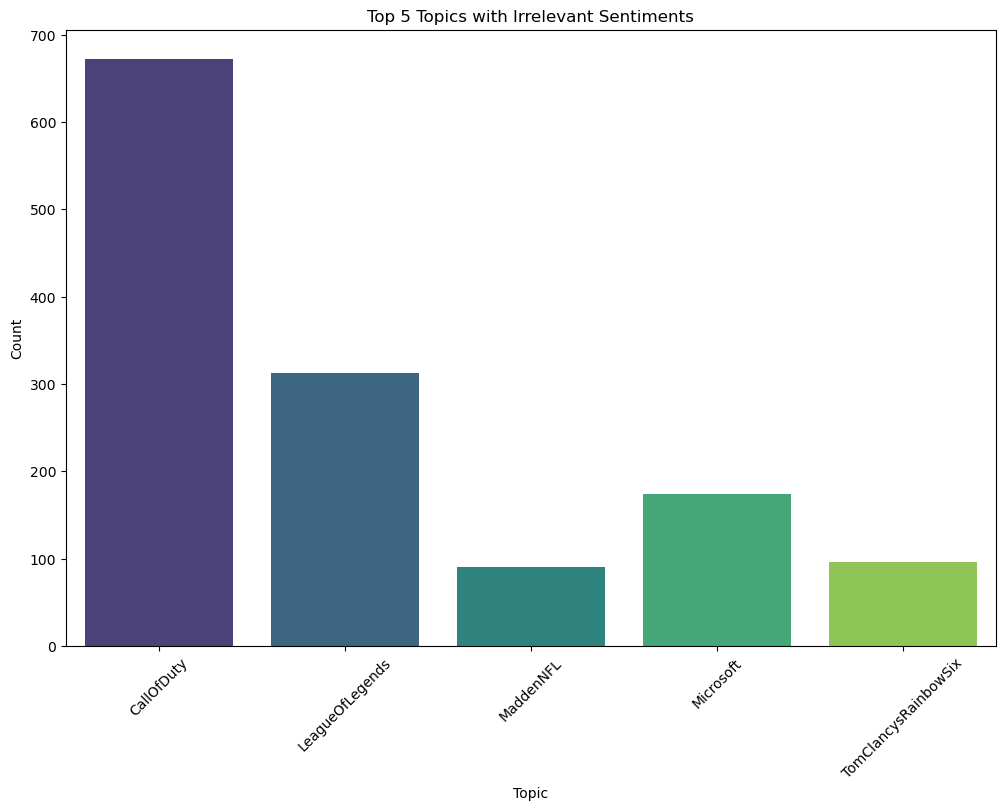

In [81]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

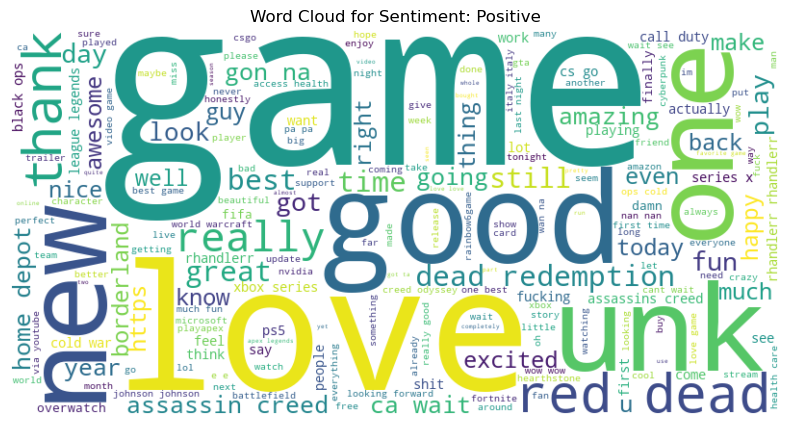

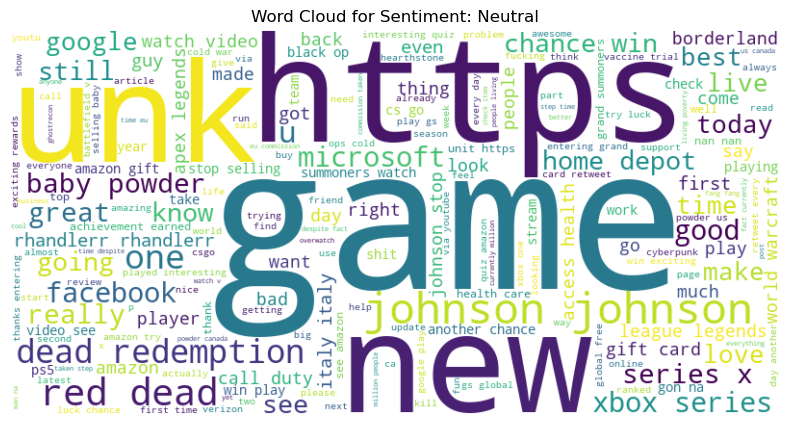

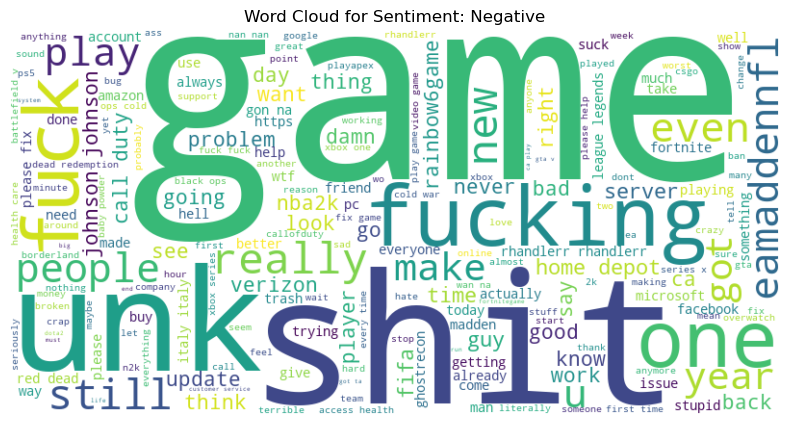

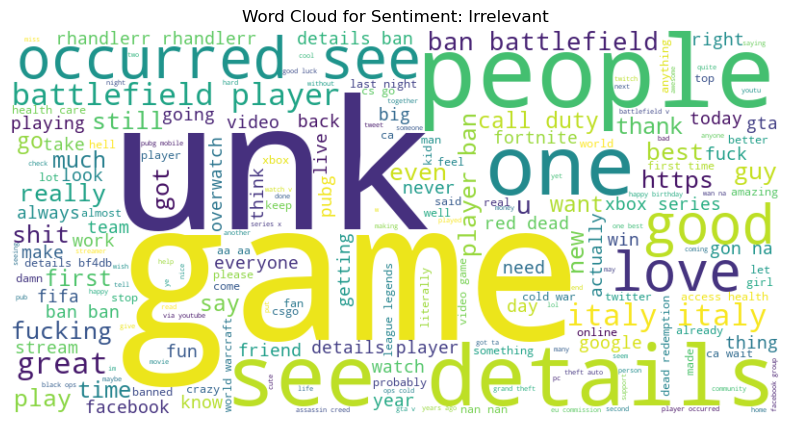

In [74]:
for sentiment in dataset["Sentiment"].unique(): 
    sentiment_text = " ".join(dataset[dataset["Sentiment"] == sentiment]["Cleaned_tweet"]) 
    wordcloud = WordCloud(width=800, height=400, background_color= "white").generate(sentiment_text) 
    plt.figure(figsize=(10, 5)) 
    plt.imshow(wordcloud, interpolation = "bilinear") 
    plt.title(f"Word Cloud for Sentiment: {sentiment}") 
    plt.axis("off") 
    plt.show()

### DEDUCTIONS
1. The topic "TomClancyRainbowSix" emerges as the most frequent topic of discussion among the analyzed Twitter data. This suggests a significant level of engagement or interest in this particular topic within the Twitter community
2. The sentiment analysis reveals that the majority of topics exhibit a negative sentiment, accounting for 30.3% of the sentiments observed.
3. Notably, topics such as "Google" and "Microsoft" predominantly exhibit a neutral sentiment. This observation suggests that discussions related to these tech giants tend to be more balanced or impartial in nature.